### Introduction & Research Questions
For my final project, I used a data set of colic in horses that I found at the following [link], (1). There are two data sources that I used from this link, the csv file containing the data set and a txt file that is a data dictionary containing fuller descriptions of the data.  Colic in horses can vary greatly in severity (2).

The research questions that I will answer using this data set are as follow:

* Is there a correlation between any of the variables?
* Are there any outliers?
* Are there any major differences observed in horses that survived and horses that did not?
* Is there a statistically significant relationship between any of the variables and the outcome?

The variables that I will focus on and use to answer the above questions are:

* **Hospital Number**:  Numeric identifier assigned to the horse.
* **Age**:  1 represents an adult horse and 2 represents a horse less than 6 months.
* **Rectal Temperature**:  The temperature is reported in degrees Celsius and a normal temperature is 37.8C.  This parameter will usually change as the problem progresses and an elevated temperature is an indication of infection.
* **Pulse**:  The pulse is measured in beats/minute.  A low or high pulse may indicate a heart condition.  A normal pulse for an adult horse is 30-40 beats/minute, although athletic horses may have a lower rate of 20-25 beats/minute.  Horses that may have painful lesions or are suffering from circulatory shock may have an elevated pulse.
* **Respiratory Rate**:  A normal respiratory rate of a horse is 8 to 10.
* **Packed Cell Volume**:  This is the number of red cells by volume in the blood.  The normal range is 30 to 50, but the level may rise as circulation becomes compromised or as the horse becomes dehydrated.
* **Total Protein**:  Normal values are 6-7.5 gms/dL, and with higher values the greater dehydration the horse may be exhibiting.
* **Outcome**:  This is labeled as 1 for surviving, 2 for dying and 3 for euthanization.

[link]: https://www.kaggle.com/uciml/horse-colic

Reference (2) PetMD. (2019, December 20). Colic in Horses: Signs, Causes and Treatment. Retrieved from https://www.petmd.com/horse/conditions/digestive/c_hr_equine_colic

#### Load Library Packages

In [1]:
# visualization
%matplotlib inline 

import pandas as pd # data analysis
import numpy as np # basic numerical operation
import thinkstats2 # module
import thinkplot # wrapper for matplotlib
import scipy.stats # for standard normal CDF
import statsmodels.formula.api as smf # for multiple regression 

#### Importing, Exploring & Cleaning the Data

In [2]:
# Read in the data.

df = pd.read_csv('horse.csv')
print(df)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

In [3]:
# How many rows and columns are in the data set?

n_rows, n_cols = df.shape
print('There are {} rows and {} columns in the data frame.'.format(n_rows, n_cols))

There are 299 rows and 28 columns in the data frame.


In [4]:
# Check the data type.

type(df)

pandas.core.frame.DataFrame

In [5]:
# Explore the column titles. 

df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [6]:
# Preview the DataFrame

df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [7]:
# I've dropped the variables that I will not be using in order for cleaner output.

df = df.drop(['surgery','temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 
         'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 
         'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 
         'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'abdomo_protein', 
         'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'], axis=1)

In [8]:
# Preview of the variables we will be looking at.

df.head()

,age,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome
0,adult,530101,38.5,66.0,28.0,45.0,8.4,died
1,adult,534817,39.2,88.0,20.0,50.0,85.0,euthanized
2,adult,530334,38.3,40.0,24.0,33.0,6.7,lived
3,young,5290409,39.1,164.0,84.0,48.0,7.2,died
4,adult,530255,37.3,104.0,35.0,74.0,7.4,died


In [9]:
# Look at the count of the outcome variable.

df.outcome.value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [10]:
# I've replaced 1 for 'lived', 2 for 'died' and 3 for 'euthanized'.

df.outcome.replace('lived', 1, inplace=True)
df.outcome.replace('died', 2, inplace=True)
df.outcome.replace('euthanized', 3, inplace=True)

In [11]:
# Confirm that the replacement was made correctly and we now have 
# integers rather than objects.

df.outcome.value_counts()

1    178
2     77
3     44
Name: outcome, dtype: int64

In [12]:
# I've replaced age adult with 1, and age young, with 2. 

df.age.replace('adult', 1, inplace=True)
df.age.replace('young', 2, inplace=True)

In [13]:
# Confirm data is no longer object and now numeric. 

df.dtypes.value_counts()

float64    5
int64      3
dtype: int64

In [14]:
# If I had a larger data set, I would be tempted to drop the rows that contained
# missing values, but as the data set is only 299 observations, I do not believe 
# that is the best option. The variable with the largest amount of 
# missing information is rectal temperature, with about 20% missing values. 
# I wonder if there were issues with obtaining rectal temperature, as not
# all animals may be comfortable with this.

df.isnull().sum()

age                    0
hospital_number        0
rectal_temp           60
pulse                 24
respiratory_rate      58
packed_cell_volume    29
total_protein         33
outcome                0
dtype: int64

#### Histograms
A distribution that is described as bell-shaped is a symmetrical or uniform distribution. The most common result is the mode. 

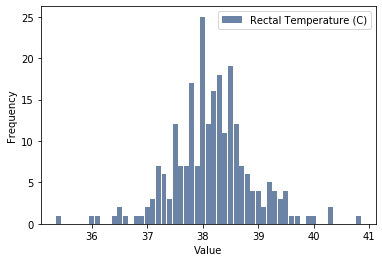

In [15]:
# Below is a histogram of rectal temperature. It can be observed as roughly
# bell-shaped and somewhat symmetrical, visually, and as the mean and mode
# are close in value. 

hist1 = thinkstats2.Hist(df.rectal_temp, label ='Rectal Temperature (C)')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Value', ylabel='Frequency')

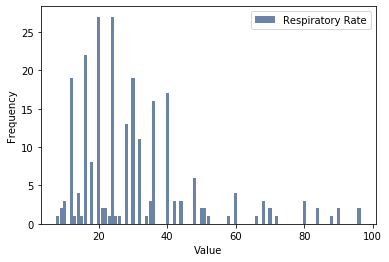

In [16]:
# The histogram below of respiratory rate is slightly skewed right.
# We can observe two modes, meaning a biomodal distribution.

hist2 = thinkstats2.Hist(df.respiratory_rate, label ='Respiratory Rate')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Value', ylabel='Frequency')

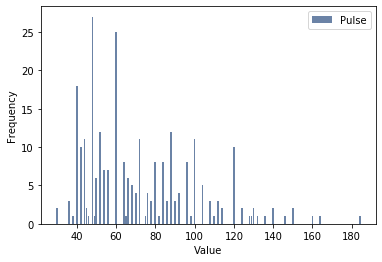

In [17]:
# This histogram of pulse below shows a distribution that 
# is slightly skewed right. 

hist3 = thinkstats2.Hist(df.pulse, label ='Pulse')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Value', ylabel='Frequency')

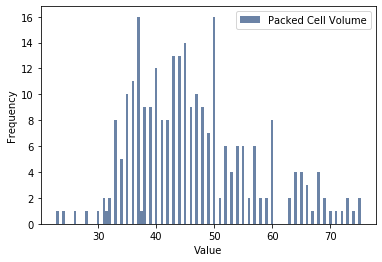

In [18]:
# The distribution of respiratory rate is slightly skewed right and 
# we can observe a bimodal distribution.

hist4 = thinkstats2.Hist(df.packed_cell_volume, label ='Packed Cell Volume')
thinkplot.Hist(hist4)
thinkplot.Config(xlabel='Value', ylabel='Frequency')

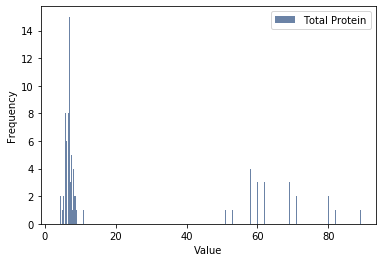

In [19]:
# The distribution of total protein is slightly skewed right.

hist5 = thinkstats2.Hist(df.total_protein, label ='Total Protein')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Value', ylabel='Frequency')

In [20]:
# I have substituted the missing data with the median of that variable.

for col in df.columns.values:
    df[col] = df[col].fillna(df[col].median())

In [21]:
# Confirm there are no longer missing values.

df.isnull().sum()

age                   0
hospital_number       0
rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
outcome               0
dtype: int64

#### Outliers
The largest and smallest methods used below to identify outliers, are provided by Hist. They take an integer, below I used 10, and return the 10 largest or smallest values. I did not observe any major outliers that I felt should be removed.  It would have been helpful to have a better understanding of the methodology of the study.  I would be curious if horses were sedated prior to obtaining vitals and medical data, or if these samples were taken on an interval basis. I had concern when comparing the data to research I’d obtained about colic in horses, as to what might be ‘normal’ conditions for horses, compared to the data set.

In [22]:
for rectal_temp, freq in hist1.Smallest(10):
    print(rectal_temp, freq)

35.4 1
36.0 1
36.1 1
36.4 1
36.5 2
36.6 1
36.8 1
36.9 1
37.0 2
37.1 3


In [23]:
for rectal_temp, freq in hist1.Largest(10):
    print(rectal_temp, freq)

40.8 1
40.3 2
40.0 1
39.9 1
39.7 1
39.6 1
39.5 4
39.4 3
39.3 4
39.2 5


In [24]:
for respiratory_rate, freq in hist2.Smallest(10):
    print(respiratory_rate, freq)

8.0 1
9.0 2
10.0 3
12.0 19
13.0 1
14.0 4
15.0 1
16.0 22
18.0 8
20.0 27


In [25]:
for respiratory_rate, freq in hist2.Largest(10):
    print(respiratory_rate, freq)

96.0 2
90.0 2
88.0 1
84.0 2
80.0 3
72.0 1
70.0 2
68.0 3
66.0 1
60.0 4


In [26]:
for pulse, freq in hist3.Smallest(10):
    print(pulse, freq)

30.0 2
36.0 3
38.0 1
40.0 18
42.0 10
44.0 11
45.0 2
46.0 1
48.0 27
49.0 1


In [27]:
for pulse, freq in hist3.Largest(10):
    print(pulse, freq)

184.0 1
164.0 1
160.0 1
150.0 2
146.0 1
140.0 2
136.0 1
132.0 1
130.0 2
129.0 1


In [28]:
for packed_cell_volume, freq in hist4.Smallest(10):
    print(packed_cell_volume, freq)

23.0 1
24.0 1
26.0 1
28.0 1
30.0 1
31.0 2
31.5 1
32.0 2
33.0 8
34.0 5


In [29]:
for packed_cell_volume, freq in hist4.Largest(10):
    print(packed_cell_volume, freq)

75.0 2
74.0 1
73.0 2
72.0 1
71.0 1
70.0 1
69.0 2
68.0 4
67.0 1
66.0 3


In [30]:
for total_protein, freq in hist5.Smallest(10):
    print(total_protein, freq)

3.3 1
4.0 1
4.5 2
4.6 1
4.7 1
4.9 2
5.0 1
5.3 2
5.5 4
5.7 3


In [31]:
for total_protein, freq in hist5.Largest(10):
    print(total_protein, freq)

89.0 1
86.0 1
85.0 1
82.0 1
81.0 2
80.0 2
77.0 2
76.0 1
75.0 3
74.0 2


#### Summary Statistics
Summary statistics are a way to use descriptive statistics to summarize a distribution. The mode describes whether there is more than one cluster and can be observed from the histograms. The mean is a computed value and describes the central tendency of a distribution. The variance describes the variability or spread of the distribution. The variance can be difficult to interpret due to the units. The standard deviation or deviation from the mean is the square root of the variance. 

In [32]:
mean1 = df.rectal_temp.mean()
var1 = df.rectal_temp.var()
std1 = df.rectal_temp.std()
mean1, var1, std1

(38.174916387959904, 0.4301405131197952, 0.655850983928358)

In [33]:
mean2 = df.respiratory_rate.mean()
var2 = df.respiratory_rate.var()
std2 = df.respiratory_rate.std()
mean2, var2, std2

(29.401337792642142, 256.0263069291371, 16.000822070416792)

In [34]:
mean3 = df.pulse.mean()
var3 = df.pulse.var()
std3 = df.pulse.std()
mean3, var3, std3

(71.35785953177258, 759.2574128526846, 27.554625979183324)

In [35]:
mean4 = df.packed_cell_volume.mean()
var4 = df.packed_cell_volume.var()
std4 = df.packed_cell_volume.std()
mean4, var4, std4

(46.180602006688964, 98.47566272362019, 9.92349045062372)

In [36]:
mean5 = df.total_protein.mean()
var5 = df.total_protein.var()
std5 = df.total_protein.std()
mean5, var5, std5

(22.42307692307693, 693.5990965410424, 26.33626960184457)

In [37]:
# To summarize the statistics in one table. 

df.describe()

,age,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,outcome
count,299.000000,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.080268,1.087733e+06,38.174916,71.357860,29.401338,46.180602,22.423077,1.551839
std,0.272162,1.532032e+06,0.655851,27.554626,16.000822,9.923490,26.336270,0.737187
min,1.000000,5.184760e+05,35.400000,30.000000,8.000000,23.000000,3.300000,1.000000
25%,1.000000,5.289040e+05,37.900000,48.500000,20.000000,39.000000,6.600000,1.000000
50%,1.000000,5.303010e+05,38.200000,64.000000,25.000000,45.000000,7.500000,1.000000
75%,1.000000,5.347360e+05,38.500000,88.000000,34.500000,50.000000,52.000000,2.000000
max,2.000000,5.305629e+06,40.800000,184.000000,96.000000,75.000000,89.000000,3.000000


#### Probability Mass Function (PMF)
Another way to represent a distribution is a probability mass function, which maps each value to its probability.  Above is a bar graph plot and step function plot that shows PMF of packed cell volume for surviving horses and those that did not survive.  Knowing that the mean of the entire distribution is 46.2 for packed cell volume, we can observe a higher probability of a packed cell volume above the mean for horses that did not live, than horses that lived. 

In [38]:
# Divide the DataFrame by the outcome, lived for horses that lived, and notlived 
# for horses that either died or were euthanized. 

lived = df[df.outcome == 1]
not_lived = df[df.outcome != 1]

In [39]:
# Use Pmf class to create Pmf objects

lived_pmf1 = thinkstats2.Pmf(lived.packed_cell_volume, label='Lived')
not_lived_pmf1 = thinkstats2.Pmf(not_lived.packed_cell_volume, label='Did Not Live')

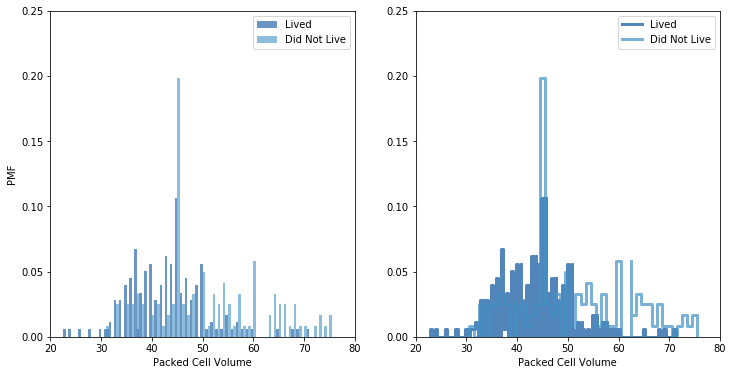

In [40]:
# Plot both Pmfs of packed cell volume for horses that lived and horses
# that did not, as bar graph and step function plot.

width=0.5
axis = [20, 80, 0, 0.25]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(lived_pmf1, align='right', width=width)
thinkplot.Hist(not_lived_pmf1, align='left', width=width)
thinkplot.Config(xlabel='Packed Cell Volume', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([lived_pmf1, not_lived_pmf1])
thinkplot.Config(xlabel='Packed Cell Volume', axis=axis)

#### Cumulative Distribution Function (CDF)
As the number of values increase, the probability associated with each value gets smaller and the effect of random noise increases. The CDF is a function that maps each value to its percentile rank. I looked at the CDF of a few different variables, pulse, rectal temperature, total protein, and respiratory rate, to gain a better idea of the distributions of each of the variables.

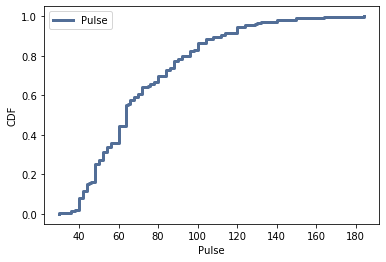

In [41]:
cdf = thinkstats2.Cdf(df.pulse, label = 'Pulse')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pulse', ylabel='CDF')

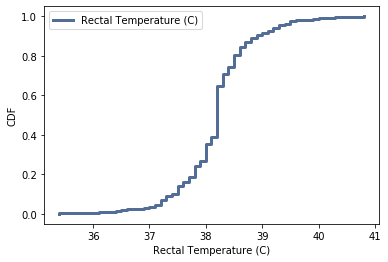

In [42]:
cdf1 = thinkstats2.Cdf(df.rectal_temp, label = 'Rectal Temperature (C)')
thinkplot.Cdf(cdf1)
thinkplot.Config(xlabel='Rectal Temperature (C)', ylabel='CDF')

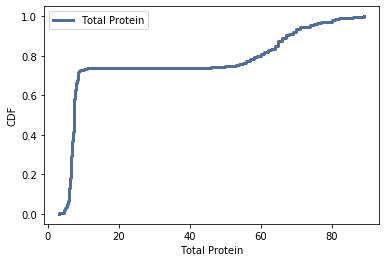

In [43]:
cdf2 = thinkstats2.Cdf(df.total_protein, label = 'Total Protein')
thinkplot.Cdf(cdf2)
thinkplot.Config(xlabel='Total Protein', ylabel='CDF')

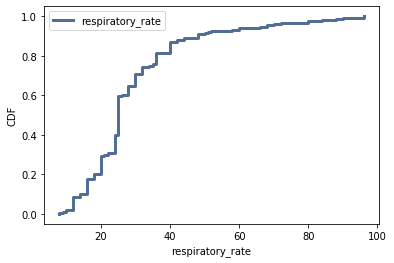

In [44]:
cdf3 = thinkstats2.Cdf(df.respiratory_rate, label = 'respiratory_rate')
thinkplot.Cdf(cdf3)
thinkplot.Config(xlabel='respiratory_rate', ylabel='CDF')

##### Complementary CDF

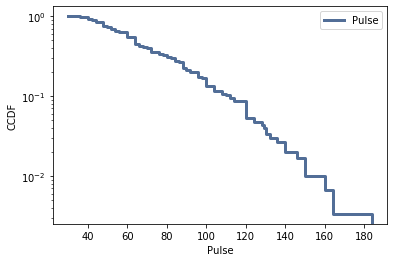

<Figure size 576x432 with 0 Axes>

In [45]:
# Based on the visual pattern of the CDF of pulse, I wanted 
# to explore this variable further by plotting the complementary CDF,
# which is the analytical distribution used to model the empirical 
# distribution. For data from an exponential distriubtion, the 
# result is a straight line. We only observe this with a pulse from
# 160 to 180. While our CDF of pulse appears to have the general shape
# of an exponential distribution, it is not.

thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='Pulse',
              ylabel='CCDF', yscale='log')

#### Correlation and Covariance - Exploring Variables
Pearson's correlation is best to be used when there is a linear relationship between the variables and the variables are roughly normal. Because of this, you should always look at the scatterplot first rather than blindly calculating a correlation coefficient. Based on the histograms, rectal temperature is the only variable with a normal distribution. Spearman's correlation mitigates the effects of outliers and skewed distributions. 

As most of the variables are measurements of a medical statistic, we cannot use time to help us infer direction of causation. We could use randomness, by dividing our sample into two groups at random and computing the mean to compare between the two groups. If the groups are close to identical in all variables but one, you can eliminate spurious relationships. 

Covariance is a measure of the tendency of two variables to vary together. Covariance is used below in the computations, as it is useful for computations but not reported as a summary statistic because it is hard to interpret, especially because of the difference in units used between the variables. 

In [46]:
# Define function to compute covariance
# np.asarray converts python sequences to NumPy arrays, if not already
# Deviation is computed from sample means if known means are not given
# Cov is then calculated using dot product of deviations, divided by length

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [47]:
# Define function to compute Pearson's correlation
# np.asarray converts python sequences to NumPy arrays, if not already
# MeanVar computes the mean and variance slightly more efficiently
# than seperate calls to np.mean and np.var (as used in Cov)

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [48]:
# Define function to compute Spearman's rank correlation. 
# The arguments are converted to pandas Series objects so that rank 
# can be used to compute the rank of each value, returning a Series.
# Then Corr is used to determine the correlation of the ranks.

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [49]:
# Assign variables for easier access.

age = df.age
rectal_temp = df.rectal_temp
pulse = df.pulse
respiratory_rate = df.respiratory_rate
packed_cell_volume = df.packed_cell_volume
total_protein = df.total_protein
outcome = df.outcome

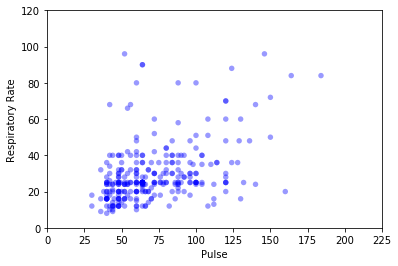

In [50]:
# Create scatterplot first prior to computing correlation as 
# Pearson's correlation only measures linear relationships.

def ScatterPlot(pulse, respiratory_rate, alpha=0.4, s=.1):
    """Make a scatter plot using Scatter provided by thinkplot.
    Alpha is used for saturation effect to make the points partly
    transparent.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(pulse, respiratory_rate, alpha=alpha)
    thinkplot.Config(xlabel='Pulse',
                     ylabel='Respiratory Rate',
                     xlim=[0, 225],
                     ylim=[0, 120],
                     legend=False)
    
ScatterPlot(pulse, respiratory_rate, alpha=0.4, s=.1)

In [51]:
# Compute Pearson's and Spearman's corelations between pulse  
# and respiratory rate.

print('Correlation', Corr(pulse, respiratory_rate))
print("Spearman's Correlation", SpearmanCorr(pulse, respiratory_rate))

Correlation 0.4333455150755774
Spearman's Correlation 0.42220440002708126


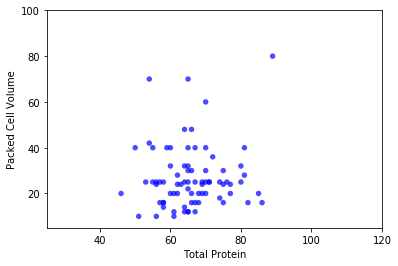

In [52]:
# Create scatterplot first prior to computing correlation as 
# Pearson's correlation only measures linear relationships.

def ScatterPlot(total_protein, packed_cell_volume, alpha=0.7, s=1):
    """Make a scatter plot using Scatter provided by thinkplot.
    Alpha is used for saturation effect to make the points partly
    transparent.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(total_protein, packed_cell_volume, alpha=alpha)
    thinkplot.Config(xlabel='Total Protein',
                     ylabel='Packed Cell Volume',
                     xlim=[25, 120],
                     ylim=[5, 100],
                     legend=False)
    
ScatterPlot(total_protein, respiratory_rate, alpha=0.7, s=1)

In [53]:
# Compute Pearson's and Spearman's corelations between pulse  
# and respiratory rate.

print('Correlation', Corr(total_protein, packed_cell_volume))
print("Spearman's Correlation", SpearmanCorr(total_protein, packed_cell_volume))

Correlation -0.05257846621558982
Spearman's Correlation 0.16367631549353887


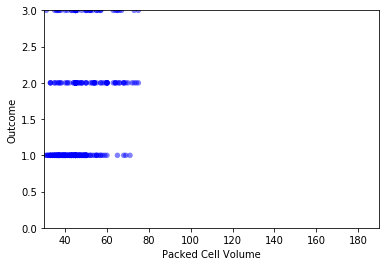

In [54]:
# Create scatterplot first prior to computing correlation as 
# Pearson's correlation only measures linear relationships.

def ScatterPlot(packed_cell_volume, outcome, alpha=0.5, s=1):
    """Make a scatter plot using Scatter provided by thinkplot.
    Alpha is used for saturation effect to make the points partly
    transparent.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(packed_cell_volume, outcome, alpha=alpha)
    thinkplot.Config(xlabel='Packed Cell Volume',
                     ylabel='Outcome',
                     xlim=[30, 190],
                     ylim=[0, 3],
                     legend=False)
    
ScatterPlot(packed_cell_volume, outcome, alpha=0.5, s=1)

In [55]:
print('Correlation', Corr(packed_cell_volume, outcome))
print("Spearman's Correlation", SpearmanCorr(packed_cell_volume, outcome))

Correlation 0.3399988490621673
Spearman's Correlation 0.3550567079000444


#### Hypothesis Testing
Quantify the size of the apparent effect by choosing a test statistic.  Define null hypothesis, a model based on the assumption that the apparent effect is NOT real. For this null hypothesis, there is no difference between horses that survived and those that did not. The packed cell volume for both groups have the same distribution. Compute the actual difference in means, then compute the probability of seeing a difference as big, or bigger, under the null hypothesis.  if p-value is low, the effect is said to be statistically significant meaning it is unlikely to have occurred by chance. The effect is more likely to appear in the larger population. There is no intersection of the CDF observed and the p-value result is 0.0 meaning the difference in packed cell volume between the groups is statistically significant. 

In [56]:
# Null hypothesis that the distributions for the groups are the same.
# Model null hypothesis by permutation, taking the values for first 
# babies and others and shuffling, to treat two groups as one big group.
# Data is a pair of sequences, one for each group.
# Test statistic computes the absolute difference in means.
# Make model records length of each group, n and m.
# Self.pool combines the groups to one NumPy array.
# Run model will simulate the null hypothesis by shuffling the pooled 
# values and splitting them into groups n and m. 

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [57]:
# Extract packed cell volume as numpy arrays.
# Call function on data and calculate the p-value.

data = lived.packed_cell_volume.values, not_lived.packed_cell_volume.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

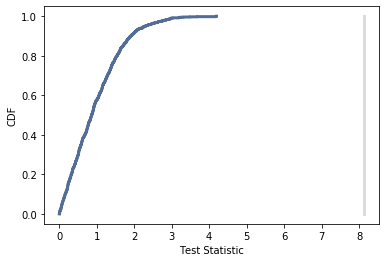

<Figure size 576x432 with 0 Axes>

In [58]:
# Plot the distribution of the test statistic 
# The grey line indicates the observed 
ht.PlotCdf()
thinkplot.Show(xlabel='Test Statistic', ylabel='CDF')

#### Regression
Below, I have two seperate models created, both with the packed cell volume as the dependent variable. For the first model, the explanatory variables are outcome equal to living and respiratory rate.  The second model also includes pulse as an explanatory variable. In both models, all of the p-values are below 0.05, except respiratory rate. These p-values indicate that there is a statistically significant relationship between packed cell volume and outcome and pulse. R2, coefficient of determination, is 0.2, which indicates that 20% of the variation in the outcome is explained by predicting the outcome using the predictors in the model.  This is a low result indicating that the model may not be a good fit for the data. It should be noted that R2 is also best used for linear relationships.

In [59]:
# smf.ols takes formula string and data frame and returns an OLS object ("ordinary least
# squares") that represents the model.
# The fit method fits the model to the data and returns a RegressionResults object.
# Print results in a readable format using summary(). 

model = smf.ols('packed_cell_volume ~ outcome==1 + respiratory_rate', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     packed_cell_volume   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     28.95
Date:                Thu, 28 May 2020   Prob (F-statistic):           3.28e-12
Time:                        12:35:32   Log-Likelihood:                -1083.2
No. Observations:                 299   AIC:                             2172.
Df Residuals:                     296   BIC:                             2184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               50.2437      1.309     38.393      0.000      47.668      52.819
outcome == 1[T.True]    -8.0693      1.075     -7.505      0.000     -10.185      -5.953
respiratory_rate         0.0252      0.033      0.763      0.446      -0.040       0.090
==============================================================================
Omnibus:                       14.152   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.789
Skew:                           0.520   Prob(JB):                     0.000615
Kurtosis:                       3.323   Cond. No.                         95.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model1 = smf.ols('packed_cell_volume ~ outcome==1 + respiratory_rate + pulse', data=df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     packed_cell_volume   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.99
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.87e-16
Time:                        12:35:32   Log-Likelihood:                -1071.3
No. Observations:                 299   AIC:                             2151.
Df Residuals:                     295   BIC:                             2165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.6220      1.838     23.731      0.000      40.004      47.240
outcome == 1[T.True]    -6.1225      1.107     -5.529      0.000      -8.302      -3.943
respiratory_rate        -0.0516      0.035     -1.458      0.146      -0.121       0.018
pulse                    0.1082      0.022      4.946      0.000       0.065       0.151
==============================================================================
Omnibus:                        9.212   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.067
Skew:                           0.330   Prob(JB):                      0.00652
Kurtosis:                       3.611   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""